### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading linkedIn job application data

In [2]:
job_application_data = pd.read_csv("C:/Users/visha/Documents/Projects/Portfolio Projects/social_profile_analysis_on_streamlit/sample_data/Job Applications.csv")
job_application_data.head()

,Application Date,Contact Email,Contact Phone Number,Company Name,Job Title,Job Url,Resume Name,Question And Answers
0,"8/9/22, 11:37 PM",NaN,NaN,Thomson Reuters,Business Process Analyst,NaN,NaN,NaN
1,"3/12/23, 11:21 PM",NaN,NaN,IndiQube,Business Analyst,NaN,NaN,NaN
2,"3/13/23, 12:09 PM",NaN,NaN,AB InBev,Associate Data Scientist,NaN,NaN,NaN
3,"9/1/22, 10:36 PM",NaN,NaN,"Pyramid Consulting, Inc",User Experience Researcher,NaN,NaN,NaN
4,"8/9/22, 11:21 PM",NaN,NaN,"DRMP, Inc.",Strategy Analyst,NaN,NaN,NaN


### Data processing steps

In [3]:
# Data Processing Function for LinkedIn Job Application Data
def process_linkedin_job_app_data(data):
    # Droping sensitive data
    data = data[['Application Date', 'Company Name', 'Job Title']]
    # Droping duplicate rows
    data = data.drop_duplicates(keep='first')
    # Splitting the date and time column into separate columns
    split_df = data['Application Date'].str.split(' ', expand=True)
    # Assigning new column names
    split_df.columns = ['Date', 'Time', 'AM/PM']
    # Replacing missing or null values with NaN
    split_df = split_df.replace('', pd.NA)
    # Concatenating the split DataFrame with the original DataFrame
    data = pd.concat([data, split_df], axis=1)
    # Droping the 'Application Date', 'Time' and 'AM/PM' columns in place
    data = data.drop(columns=['Application Date', 'Time', 'AM/PM'])
    # Converting the 'Date' column to a datetime data type
    data['Date'] = pd.to_datetime(data['Date'])
    # Droping the index column from the DataFrame
    data = data.reset_index(drop=True)
    return data

In [4]:
# Precessing the data
job_application_data_processed = process_linkedin_job_app_data(job_application_data)
job_application_data_processed.head()

,Company Name,Job Title,Date
0,Thomson Reuters,Business Process Analyst,2022-08-09
1,IndiQube,Business Analyst,2023-03-12
2,AB InBev,Associate Data Scientist,2023-03-13
3,"Pyramid Consulting, Inc",User Experience Researcher,2022-09-01
4,"DRMP, Inc.",Strategy Analyst,2022-08-09


### Data insights and visualization

In [5]:
# Exploring KPI
#Total number of jobs applied
print(len(job_application_data_processed), 'jobs applied')

90 jobs applied


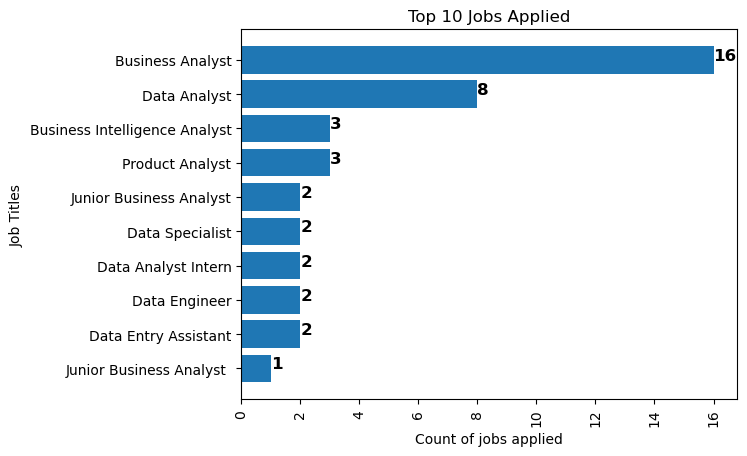

In [10]:
# Grouping the data by job title and counting the number of occurrences
jobs_applied = job_application_data_processed.groupby('Job Title').size().reset_index(name='count')
# Sorting the data by count in descending order and selecting the top 10 rows
top_jobs_applied = jobs_applied.sort_values("count", ascending=False).head(10)
# Sorting the top jobs by count in descending order
top_jobs_applied = top_jobs_applied.sort_values("count", ascending=True)

# Ploting the top jobs applied in a vertical bar chart
plt.barh(top_jobs_applied['Job Title'], top_jobs_applied['count'])
plt.title("Top 10 Jobs Applied")
plt.xticks(rotation = 90)
plt.xlabel('Count of jobs applied')
plt.ylabel('Job Titles')
# Adding labels to the bars
for i, v in enumerate(top_jobs_applied["count"]):
    plt.text(v + 0, i, str(v), color="black", fontweight="bold", fontsize=12)

plt.show()

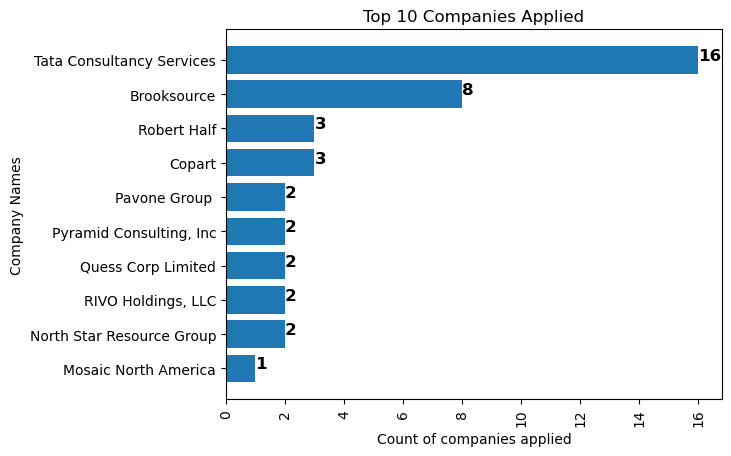

In [14]:
# Grouping the data by company name and counting the number of occurrences
companies_applied = job_application_data_processed.groupby('Company Name').size().reset_index(name='count')
# Sorting the data by count in descending order and selecting the top 10 rows
top_companies_applied = companies_applied.sort_values("count", ascending=False).head(10)
# Sorting the top companies by count in descending order
top_companies_applied = top_companies_applied.sort_values("count", ascending=True)

# Ploting the top companies applied in a vertical bar chart
plt.barh(top_companies_applied['Company Name'], top_jobs_applied['count'])
plt.title("Top 10 Companies Applied")
plt.xticks(rotation = 90)
plt.xlabel('Count of companies applied')
plt.ylabel('Company Names')
# Adding labels to the bars
for i, v in enumerate(top_jobs_applied["count"]):
    plt.text(v + 0, i, str(v), color="black", fontweight="bold", fontsize=12)

plt.show()

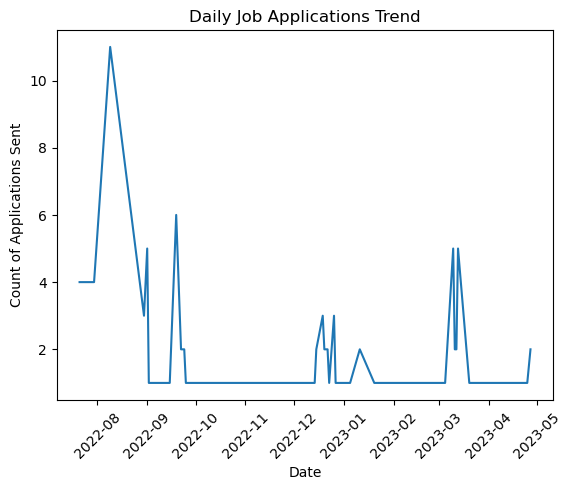

In [12]:
# Grouping the DataFrame by the date column and counting the number of applications for each day
daily_applications = job_application_data_processed.groupby('Date').size().reset_index(name='count')

# Plotting the data using a line chart
plt.plot(daily_applications['Date'], daily_applications['count'])
plt.xlabel('Date')
plt.ylabel('Count of Applications Sent')
plt.title('Daily Job Applications Trend')
plt.xticks(rotation=45)
plt.show()